C:\Users\princenithin\AppData\Local\Temp\ipykernel_9712\51633496.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


=== Basic Data Information ===

Customers Dataset Shape: (200, 4)
Products Dataset Shape: (100, 4)
Transactions Dataset Shape: (1000, 7)

=== Customer Analysis ===


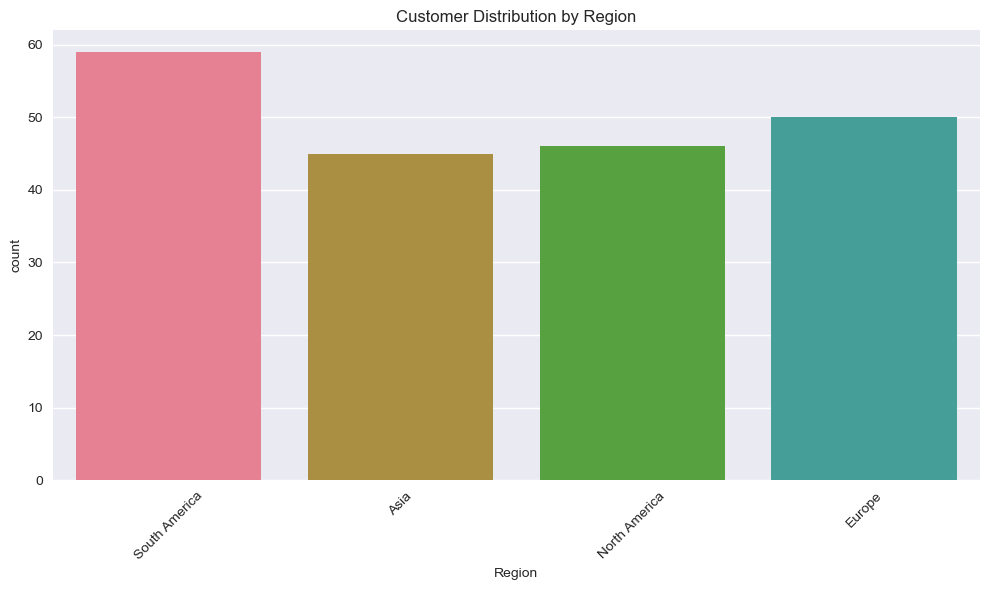

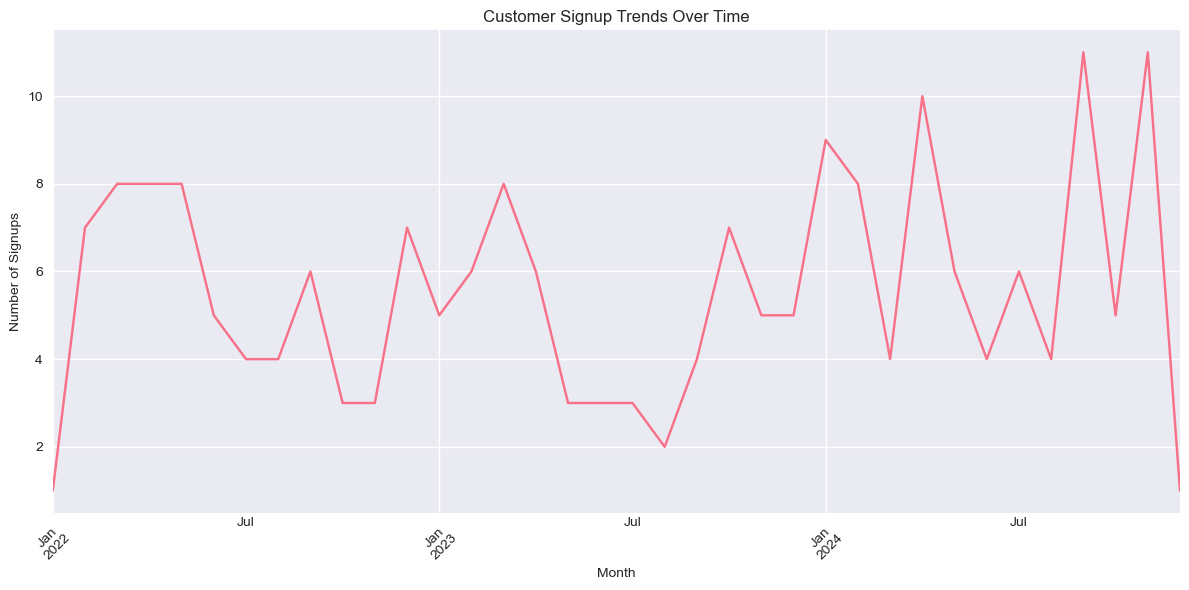


=== Product Analysis ===


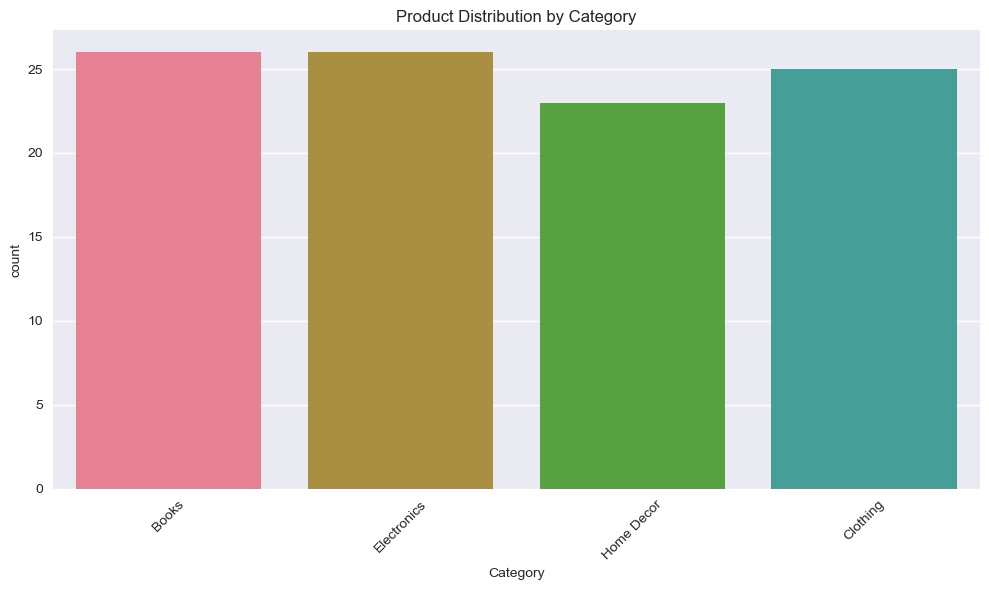

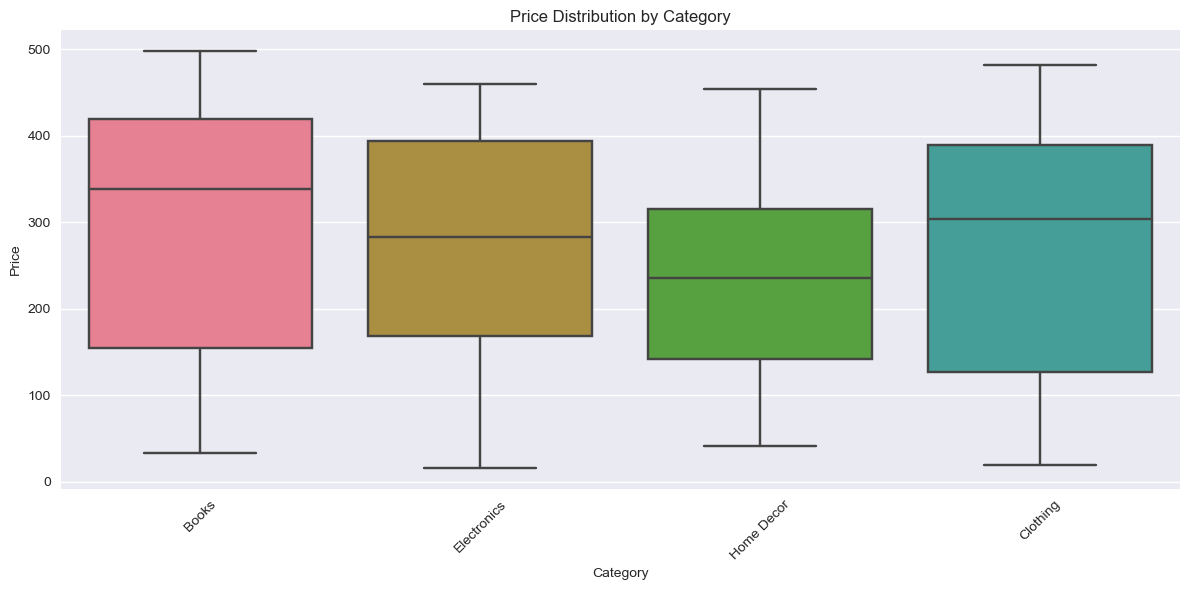


=== Transaction Analysis ===


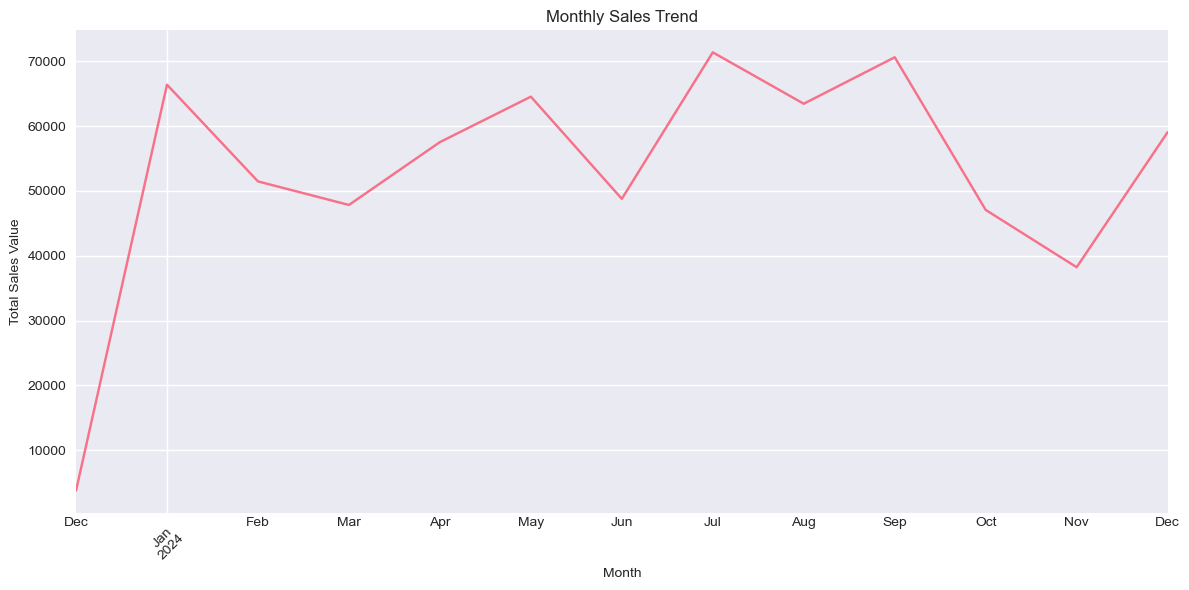

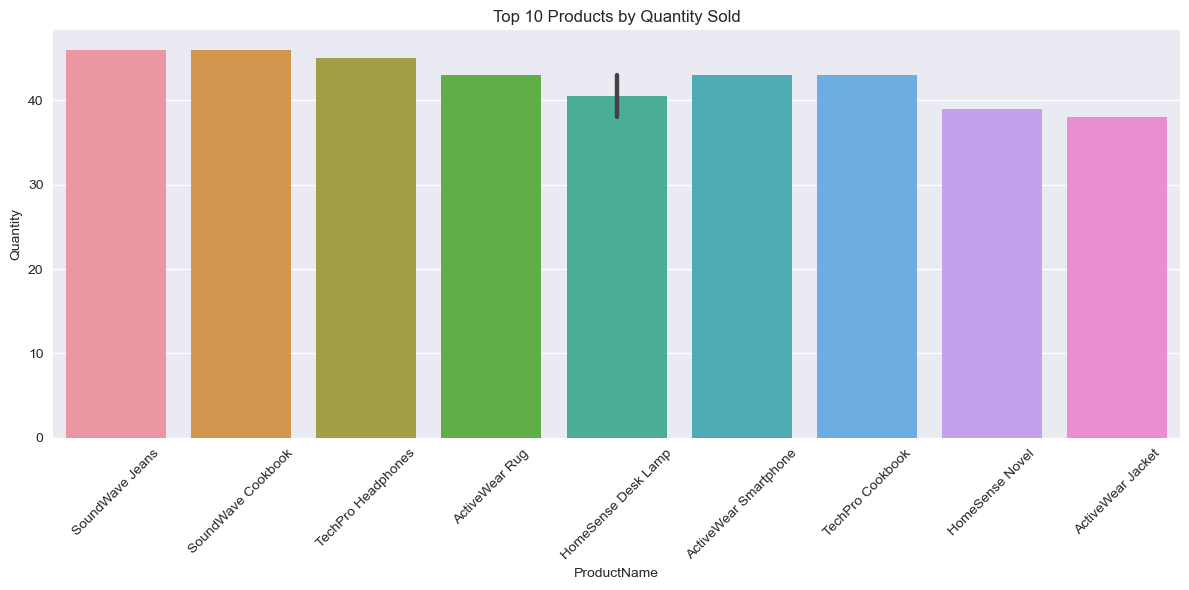


=== Customer Purchase Behavior ===


C:\Users\princenithin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


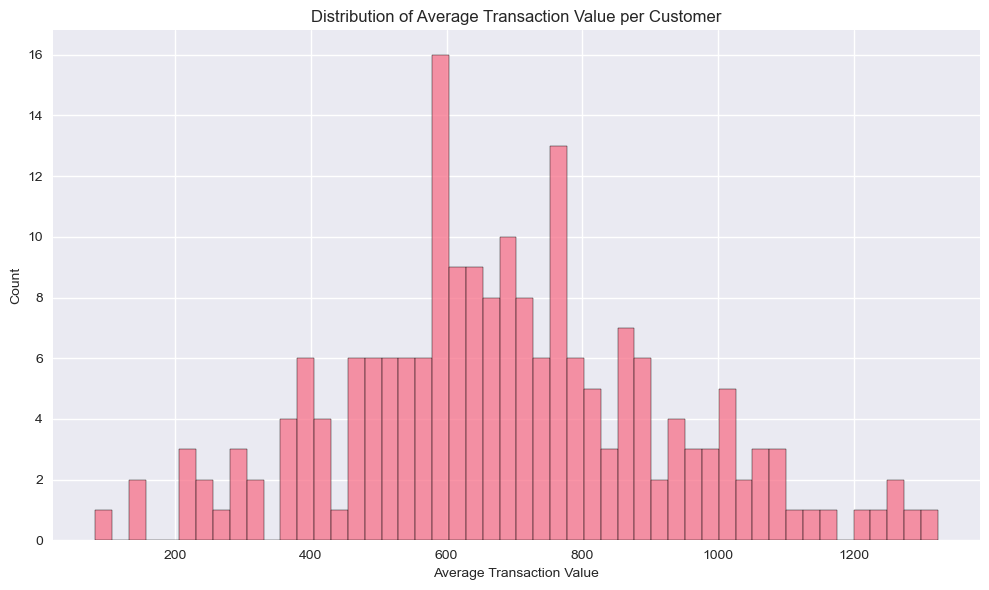

C:\Users\princenithin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


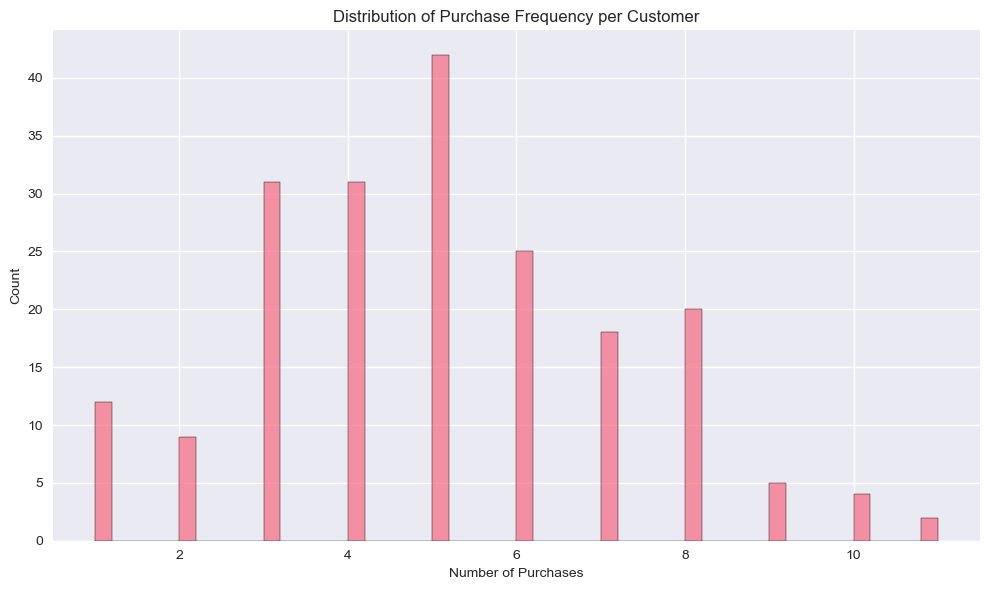


=== Additional Insights ===

Key Metrics:
Total Revenue: $689,995.56
Total Customers: 200
Total Products: 100
Average Transaction Value: $690.00

Top 5 Most Valuable Customers:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64

Category Performance:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

Analysis complete! Check 'EDA_Insights.txt' for detailed insights.


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Basic data exploration
print("=== Basic Data Information ===")
print("\nCustomers Dataset Shape:", customers.shape)
print("Products Dataset Shape:", products.shape)
print("Transactions Dataset Shape:", transactions.shape)

# Data preprocessing
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# 1. Customer Analysis
print("\n=== Customer Analysis ===")

# Regional distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Customer signup trends
plt.figure(figsize=(12, 6))
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
monthly_signups = customers.groupby('SignupMonth').size()
monthly_signups.plot(kind='line')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Product Analysis
print("\n=== Product Analysis ===")

# Category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category')
plt.title('Product Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=products, x='Category', y='Price')
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Transaction Analysis
print("\n=== Transaction Analysis ===")

# Monthly sales trend
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top selling products
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products_names = pd.merge(
    top_products.reset_index(),
    products[['ProductID', 'ProductName']],
    on='ProductID'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products_names, x='ProductName', y='Quantity')
plt.title('Top 10 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Customer Purchase Behavior
print("\n=== Customer Purchase Behavior ===")

# Average transaction value per customer
avg_transaction_value = transactions.groupby('CustomerID')['TotalValue'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(avg_transaction_value, bins=50)
plt.title('Distribution of Average Transaction Value per Customer')
plt.xlabel('Average Transaction Value')
plt.tight_layout()
plt.show()

# Purchase frequency by customer
purchase_frequency = transactions.groupby('CustomerID').size()
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency, bins=50)
plt.title('Distribution of Purchase Frequency per Customer')
plt.xlabel('Number of Purchases')
plt.tight_layout()
plt.show()

# 5. Additional Insights
print("\n=== Additional Insights ===")

# Calculate key metrics
total_revenue = transactions['TotalValue'].sum()
total_customers = customers['CustomerID'].nunique()
total_products = products['ProductID'].nunique()
avg_transaction_value = transactions['TotalValue'].mean()

print(f"\nKey Metrics:")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Customers: {total_customers}")
print(f"Total Products: {total_products}")
print(f"Average Transaction Value: ${avg_transaction_value:.2f}")

# Top 5 most valuable customers
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Most Valuable Customers:")
print(top_customers)

# Category performance
category_performance = pd.merge(
    transactions,
    products[['ProductID', 'Category']],
    on='ProductID'
)
category_sales = category_performance.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nCategory Performance:")
print(category_sales)

# Save insights to a text file
with open('EDA_Insights.txt', 'w') as f:
    f.write("E-Commerce Data Analysis Insights\n")
    f.write("================================\n\n")
    
    f.write("1. Customer Base:\n")
    f.write(f"- Total number of customers: {total_customers}\n")
    f.write(f"- Most represented region: {customers['Region'].mode()[0]}\n\n")
    
    f.write("2. Product Portfolio:\n")
    f.write(f"- Total number of products: {total_products}\n")
    f.write(f"- Number of categories: {len(products['Category'].unique())}\n")
    f.write(f"- Average product price: ${products['Price'].mean():.2f}\n\n")
    
    f.write("3. Sales Performance:\n")
    f.write(f"- Total revenue: ${total_revenue:,.2f}\n")
    f.write(f"- Average transaction value: ${avg_transaction_value:.2f}\n")
    
print("\nAnalysis complete! Check 'EDA_Insights.txt' for detailed insights.")